In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
train_df = pd.read_csv('//kaggle//input//titanic//train.csv')
train_df.dropna(inplace=True)

print(train_df)


     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

In [4]:

features = ['Pclass','Sex','SibSp','Parch','Embarked']
Y_train = train_df['Survived']
X_train = train_df[features]
# Encode categorical columns
#encoder = LabelEncoder()
#X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
#X_train['Embarked'] = encoder.fit_transform(X_train['Embarked'])


# Perform one-hot encoding on the categorical features
#X_train_encoded = pd.get_dummies(X_train, columns=['Pclass', 'SibSp', 'Parch'])
X_train_encoded = pd.get_dummies(X_train, columns = features)

X_train = X_train_encoded
#X_train = train_df[features]
#input_dim = len(features) 

X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.2)
Y_train = np.array(Y_train, dtype=np.float32)
Y_val = np.array(Y_val, dtype=np.float32)


In [5]:
model = Sequential()
model.add(Dense(64,input_shape=(X_train.shape[1],),activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [6]:
model.compile(optimizer = 'adam',loss = 'BinaryCrossentropy', metrics = ['accuracy',])

In [7]:


history = model.fit(X_train,Y_train, batch_size= 120, epochs = 100, validation_data = (X_val,Y_val) )

Epoch 1/100
2/2 [==============================] - 1s 202ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6831 - val_accuracy: 0.6757
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6785 - accuracy: 0.6849 - val_loss: 0.6709 - val_accuracy: 0.6486
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 0.6623 - accuracy: 0.6781 - val_loss: 0.6597 - val_accuracy: 0.6486
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6484 - accuracy: 0.6781 - val_loss: 0.6488 - val_accuracy: 0.6486
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6356 - accuracy: 0.6781 - val_loss: 0.6396 - val_accuracy: 0.6486
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.6235 - accuracy: 0.6781 - val_loss: 0.6312 - val_accuracy: 0.6486
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6123 - accuracy: 0.6781 - val_loss: 0.6235 - val_accuracy: 0.6486
Epoch 8/100
2/2 [==

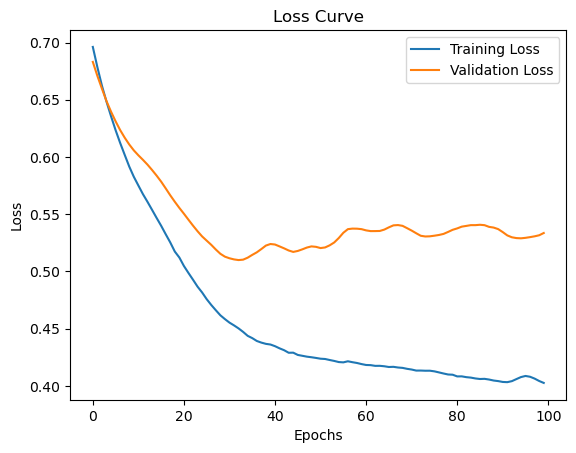

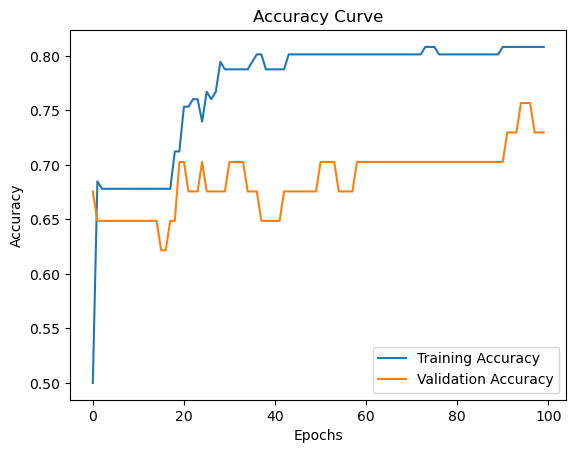

In [8]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()